In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

save_file = "./raw_result.jsonl"
with open(save_file, "r") as f:
    raw_result = [json.loads(line) for line in f.readlines()]

# change the format of raw_result to pandas.DataFrame
import pandas as pd
raw_result_df = pd.DataFrame(raw_result)
print(raw_result_df.head())

# sort the dataframe by the column "acc_davincii"
raw_result_df = raw_result_df.sort_values(by="acc_prune", ascending=False)

                   relation  acc_davincii  acc_vanilla   acc_loo  \
0   applies_to_jurisdiction      0.744706     0.671450  0.681635   
1                    author      0.369412     0.609259  0.669282   
2            award_received      0.114118     0.138148  0.146123   
3  basic_form_of_government      0.258824     0.113333  0.114826   
4                   capital      0.656471     0.675926  0.688646   

   acc_reweight  acc_prune  
0      0.714790   0.719352  
1      0.690366   0.714051  
2      0.161943   0.166493  
3      0.126412   0.140880  
4      0.706542   0.714213  


In [2]:
num_relation = 70
relation = raw_result_df["relation"][:num_relation].tolist()
acc_davincii = raw_result_df["acc_davincii"][:num_relation].tolist()
acc_vanilla = raw_result_df["acc_vanilla"][:num_relation].tolist()
acc_loo = raw_result_df["acc_loo"][:num_relation].tolist()
acc_reweight = raw_result_df["acc_reweight"][:num_relation].tolist()
acc_prune = raw_result_df["acc_prune"][:num_relation].tolist()

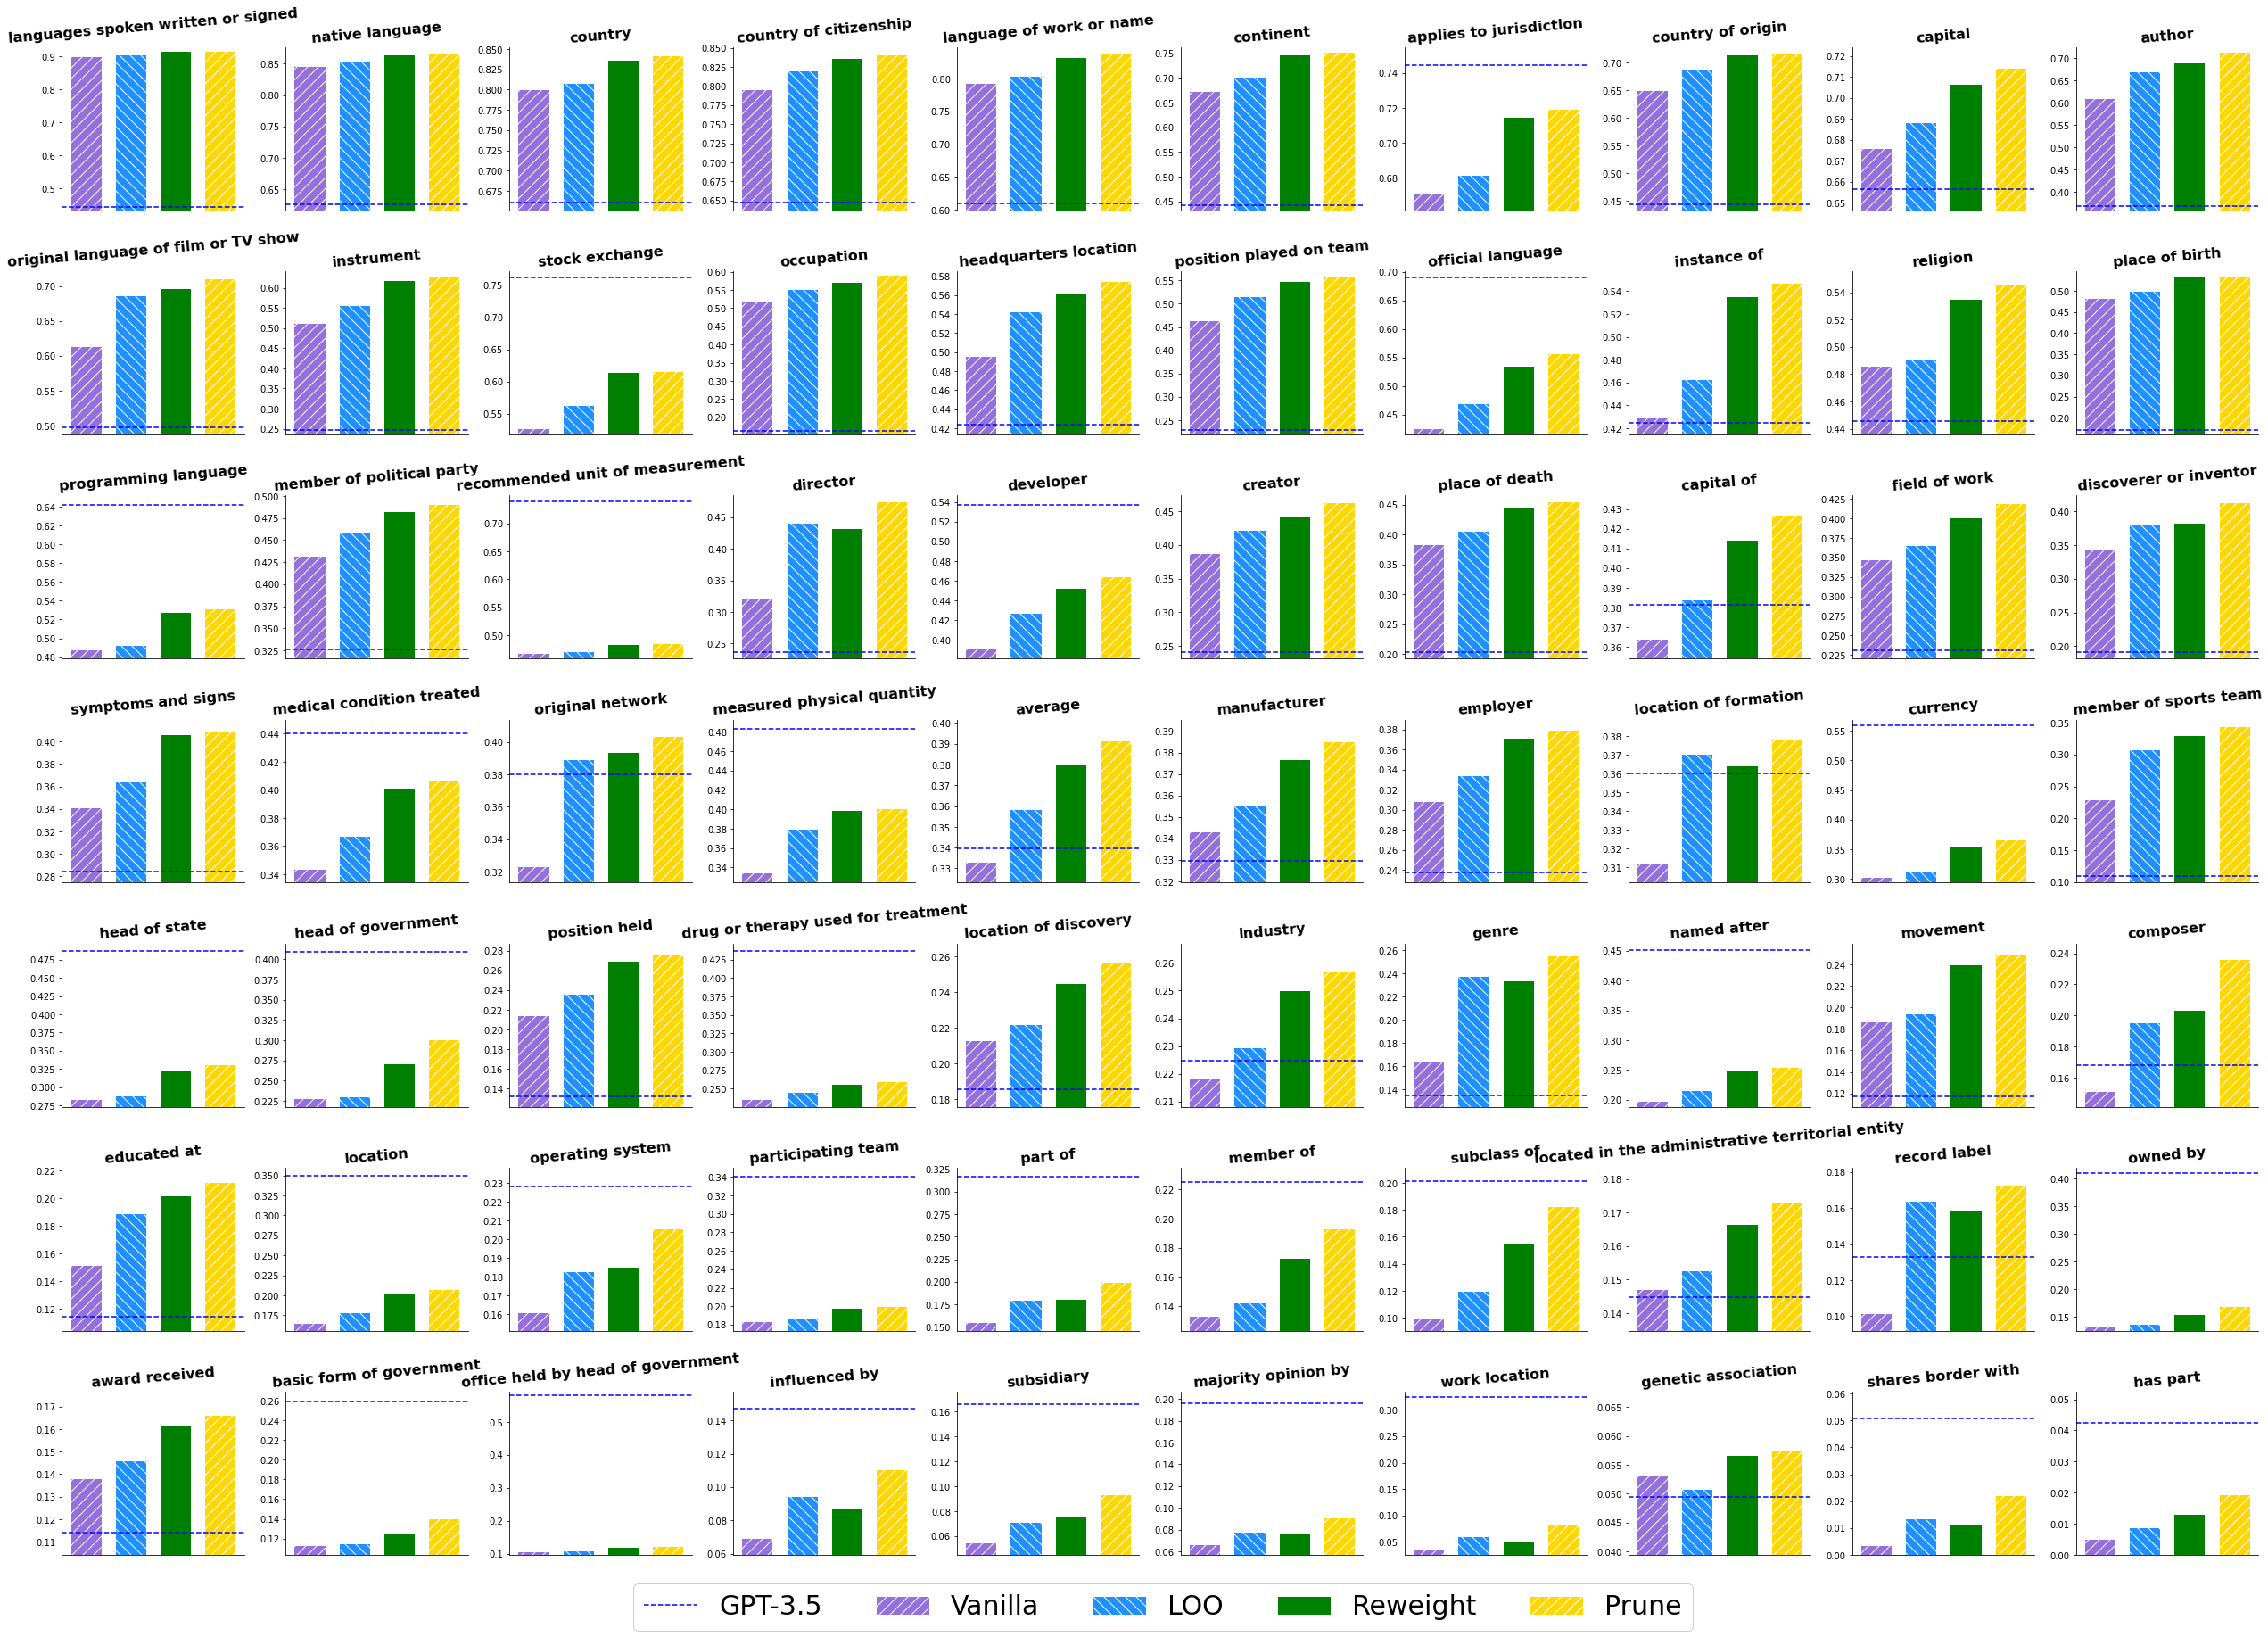

In [5]:
H = 7
W = 10
width = 3.5


patterns = ['//', '\\\\', '', '//', "\\", '+', '\\\\', 'x', '++']
color = [ "mediumpurple", "dodgerblue", "green","gold","darkorange", "darkcyan", "darkmagenta", "darkgoldenrod", "darkslategray", "darkviolet"]

fig, axs = plt.subplots(H, W, figsize=(W * width, H * width))
for i in range(H):
    for j in range(W):
        index = i*W+j

        # x = ["vanilla", "loo", "reweight", "prune"]
        y = [acc_vanilla[index], acc_loo[index], acc_reweight[index], acc_prune[index]]
        values = [acc_davincii[index], acc_vanilla[index], acc_loo[index], acc_reweight[index], acc_prune[index]]
        minn = max(min(values)-0.01, 0.0)
        maxx = min(max(values)+0.01, 1.0)
        axs[i, j].set_ylim([minn, maxx])

        axs[i, j].bar( - 0.20, y[0], width=0.07, color = color[0], hatch = patterns[0], edgecolor='white', align='center', label="Vanilla")
        axs[i, j].bar( - 0.10, y[1], width=0.07,color = color[1], hatch = patterns[1], edgecolor='white', align='center', label="LOO")
        axs[i, j].bar( 0 , y[2], width=0.07, color = color[2], hatch = patterns[2], edgecolor='white', align='center', label="Reweight")
        axs[i, j].bar( 0.10, y[3], width=0.07, color = color[3], hatch = patterns[3], edgecolor='white', align='center', label="Prune")
        axs[i, j].set_xticks([])

        axs[i, j].set_title(relation[index].replace("_", " "), fontsize=16, rotation = 5, fontweight='bold')
        axs[i, j].axhline(y=acc_davincii[index], color='b', linestyle='--',label="GPT-3.5")
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)


lines, labels = axs[0, 0].get_legend_handles_labels()
fig.legend( lines, labels, bbox_to_anchor=(0.75, 0.0),ncol=5, framealpha=1, fontsize=30)
# fig.legend( lines, labels,           
            # bbox_to_anchor=(0.74, 0.96),ncol=5, framealpha=1
# )

plt.tight_layout()
plt.savefig("results.pdf", format="pdf", bbox_inches="tight")
plt.show()